## Kewal Thacker<br>Reg No. 230968126<br>Week 5

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

#### Exercise 1

Download the "Womens Clothing E-Commerce Reviews.zip" file and answer the following:  

In [2]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

1. Preprocessing:  
    - Find any null values are present or not, If present remove those data.  
    - Remove the data that have less than 5 reviews.  
    - Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations.  

In [5]:
df = df.dropna()

df = df[df['Positive Feedback Count'] >= 5]

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['Cleaned Review Text'] = df['Review Text'].apply(clean_text)

In [6]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Cleaned Review Text
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,this shirt is very flattering to all due to th...
10,10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,dress runs small esp where the zipper area run...
21,21,1080,55,I'm torn!,"I'm upset because for the price of the dress, ...",4,1,14,General,Dresses,Dresses,im upset because for the price of the dress i ...
22,22,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,first of all this is not pullover styling ther...
31,31,1060,46,Cuter in oerson!,I never would have given these pants a second ...,5,1,7,General Petite,Bottoms,Pants,i never would have given these pants a second ...


2. Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20).  

In [7]:
X = df['Cleaned Review Text']
y = df['Recommended IND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if 
item is recommended

In [8]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

4. Tabulate accuracy in terms of precision, recall and F1 score.  

In [9]:
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.48      0.60       149
           1       0.86      0.96      0.91       501

    accuracy                           0.85       650
   macro avg       0.83      0.72      0.75       650
weighted avg       0.85      0.85      0.84       650



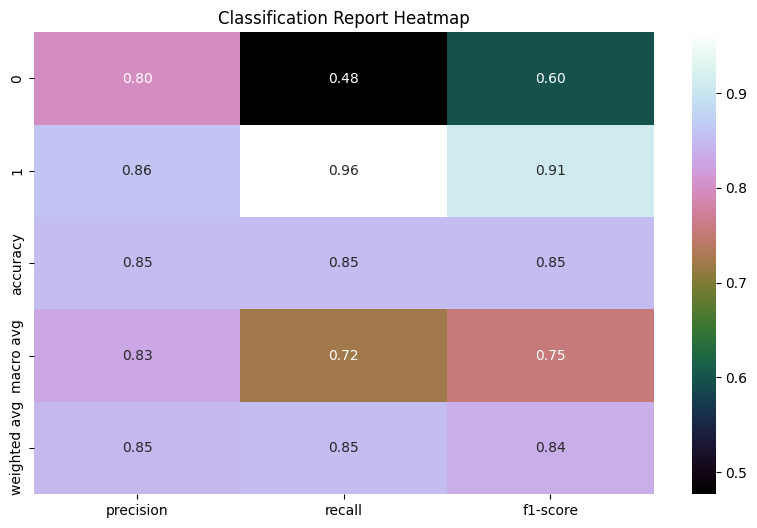

In [17]:
report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='cubehelix', fmt='.2f', cbar=True)
plt.title("Classification Report Heatmap")
plt.show()

#### Exercise 2

1. Data Preprocessing and Feature Engineering 
    - Load the dataset and explore its structure. 
    - Identify and handle missing values appropriately. 
    - Perform feature selection by calculating correlation coefficients and removing highly correlated features. 
    - Convert continuous variables into categorical bins where appropriate (e.g., discretizing age-based rates). 
    - Apply dimensionality reduction techniques such as PCA to optimize feature space. 
    - Create a binary target variable based on whether the 'Total.Rate' is above or below the third quartile, making classification more challenging. 

In [52]:
df=pd.read_csv('cancer.csv')
df.head()

,State,Total.Rate,Total.Number,Total.Population,Rates.Age.< 18,Rates.Age.18-45,Rates.Age.45-64,Rates.Age.> 64,Rates.Age and Sex.Female.< 18,Rates.Age and Sex.Male.< 18,...,Types.Lung.Age and Sex.Male.45 - 64,Types.Lung.Age and Sex.Female.> 64,Types.Lung.Age and Sex.Male.> 64,Types.Lung.Race.White,Types.Lung.Race.White non-Hispanic,Types.Lung.Race.Black,Types.Lung.Race.Black non-Hispanic,Types.Lung.Race.Asian,Types.Lung.Race.Indigenous,Types.Lung.Race.Hispanic
0,Alabama,214.2,71529.0,33387205.0,2.0,18.5,244.7,1017.8,2.0,2.1,...,102.9,221.7,457.4,59.9,60.4,52.6,52.8,23.0,22.9,14.8
1,Alaska,128.1,6361.0,4966180.0,1.7,11.8,170.9,965.2,0.0,0.0,...,50.3,268.3,335.0,48.7,49.5,45.6,47.9,33.0,74.4,0.0
2,Arizona,165.6,74286.0,44845598.0,2.5,13.6,173.6,840.2,2.6,2.5,...,47.0,191.9,275.8,39.5,42.2,38.2,40.4,21.3,11.1,21.6
3,Arkansas,223.9,45627.0,20382448.0,2.3,17.6,250.1,1048.3,2.6,2.0,...,106.5,248.7,484.7,63.4,64.2,62.9,63.0,18.1,16.2,14.6
4,California,150.9,393980.0,261135696.0,2.6,13.7,163.7,902.4,2.4,2.8,...,36.8,192.5,269.0,37.2,42.6,46.5,48.6,25.8,18.4,18.3


In [53]:
df.shape

(51, 75)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         51 non-null     object 
 1   Total.Rate                                    51 non-null     float64
 2   Total.Number                                  51 non-null     float64
 3   Total.Population                              51 non-null     float64
 4   Rates.Age.< 18                                51 non-null     float64
 5   Rates.Age.18-45                               51 non-null     float64
 6   Rates.Age.45-64                               51 non-null     float64
 7   Rates.Age.> 64                                51 non-null     float64
 8   Rates.Age and Sex.Female.< 18                 51 non-null     float64
 9   Rates.Age and Sex.Male.< 18                   51 non-null     float

In [55]:
print(df.isnull().sum().sum())

0


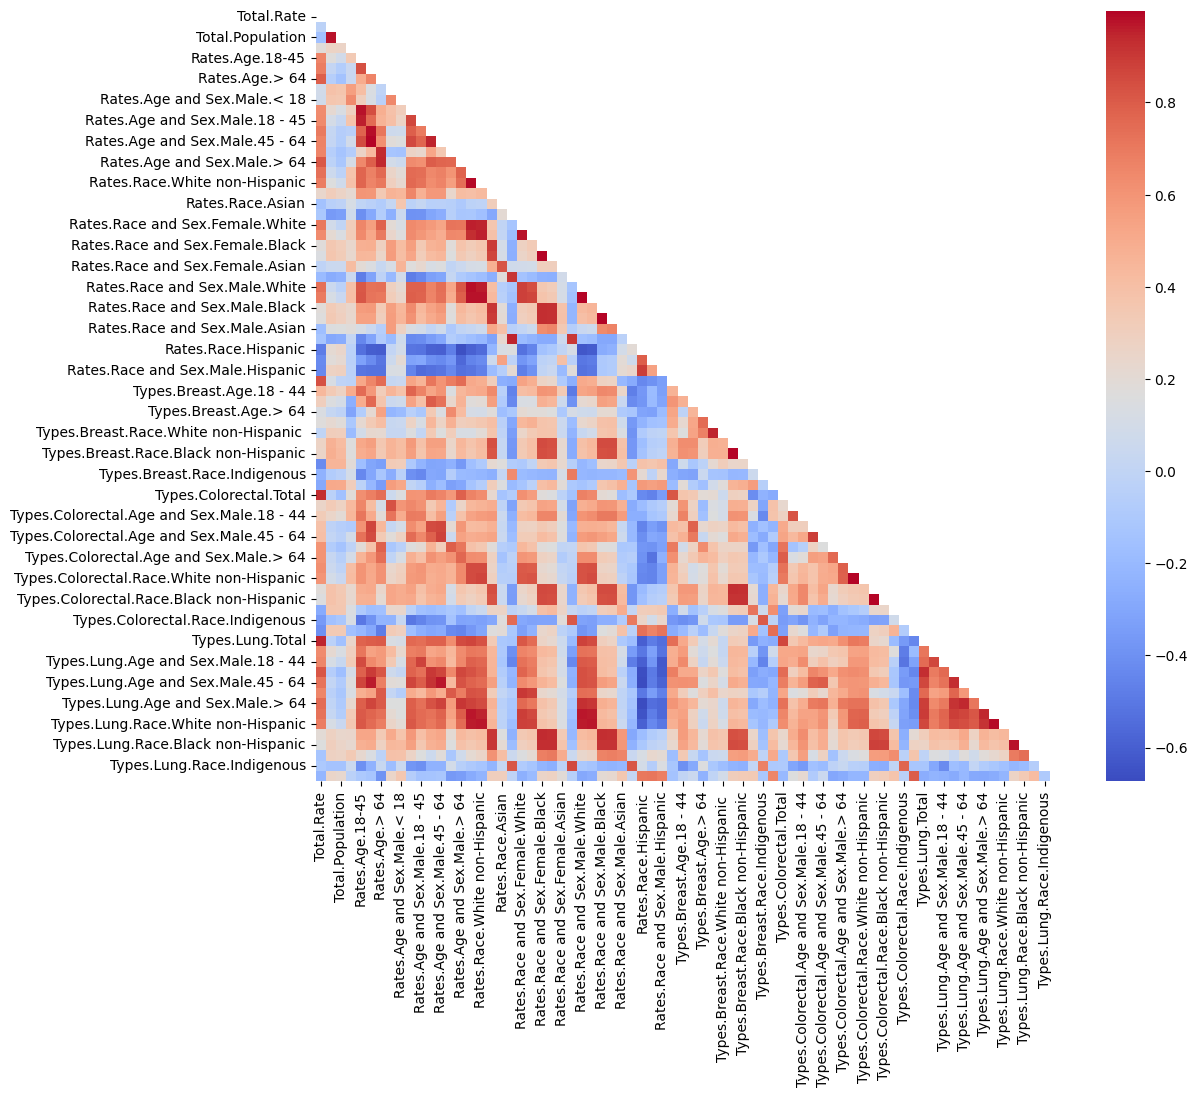

In [56]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', mask=mask)
plt.show()

In [57]:
columns_to_keep = [
    'Rates.Age.< 18', 
    'Rates.Age.18-45', 
    'Rates.Age.45-64', 
    'Rates.Age.> 64', 
    'Types.Lung.Race.White', 
    'Types.Lung.Race.Black', 
    'Types.Lung.Race.Hispanic'
]

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

In [58]:
high_corr_var = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  
            colname = corr_matrix.columns[i] 
            if colname not in columns_to_keep:
                high_corr_var.add(colname)

df.drop(columns=high_corr_var, axis=1, inplace=True)

print("Dropped columns due to high correlation:", high_corr_var)

Dropped columns due to high correlation: {'Rates.Age and Sex.Female.45 - 64', 'Rates.Race and Sex.Male.White', 'Rates.Age and Sex.Female.18 - 45', 'Rates.Race and Sex.Female.White non-Hispanic', 'Types.Lung.Race.White non-Hispanic', 'Types.Lung.Age and Sex.Female.> 64', 'Types.Lung.Age and Sex.Male.> 64', 'Rates.Age and Sex.Male.> 64', 'Rates.Race and Sex.Female.Black non-Hispanic', 'Rates.Race and Sex.Female.White', 'Types.Colorectal.Total', 'Rates.Age and Sex.Male.45 - 64', 'Rates.Race and Sex.Male.Black', 'Types.Lung.Total', 'Types.Breast.Race.White non-Hispanic ', 'Types.Colorectal.Race.Black', 'Types.Colorectal.Race.Black non-Hispanic', 'Rates.Age and Sex.Female.> 64', 'Types.Breast.Race.Black non-Hispanic', 'Rates.Race.White non-Hispanic', 'Types.Colorectal.Race.White non-Hispanic', 'Rates.Race and Sex.Male.Black non-Hispanic', 'Rates.Age and Sex.Male.18 - 45', 'Types.Lung.Race.Black non-Hispanic', 'Rates.Race and Sex.Male.White non-Hispanic', 'Rates.Race and Sex.Male.Indigenous'

In [49]:
df['Rates.Age.< 18_bin'] = pd.cut(df['Rates.Age.< 18'], bins=[0, 5, 15, 30], labels=['Low', 'Medium', 'High'])

In [59]:
from sklearn.decomposition import PCA

X = df.drop(columns=['State', 'Total.Rate']) 
y = df['Total.Rate']

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(X_pca)

In [61]:
q3 = df['Total.Rate'].quantile(0.75)
df['Target'] = (df['Total.Rate'] > q3).astype(int)

2. Split the dataset into training and testing sets with an 80-20 ratio.

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca_df, df['Target'], test_size=0.2, random_state=42)

3. Implementing Naïve Bayes  
    - Select the following features for classification: 
        - Rates.Age.< 18 
        - Rates.Age.18-45 
        - Rates.Age.45-64 
        - Rates.Age.> 64 
        - Types.Lung.Race.White 
        - Types.Lung.Race.Black 
        - Types.Lung.Race.Hispanic 
    - Train multiple Naïve Bayes models (GaussianNB, MultinomialNB, and BernoulliNB) using only the selected features. 
    - Compare the models based on precision, recall, F1-score, and AUC-ROC curve. 
    - Analyze the assumptions of each Naïve Bayes variant and determine which one fits the dataset best. 

In [64]:
X_selected = df[['Rates.Age.< 18', 'Rates.Age.18-45', 'Rates.Age.45-64', 'Rates.Age.> 64',
                 'Types.Lung.Race.White', 'Types.Lung.Race.Black', 'Types.Lung.Race.Hispanic']]

X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, df['Target'], test_size=0.2, random_state=42)

In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train_selected, y_train)
mnb.fit(X_train_selected, y_train)
bnb.fit(X_train_selected, y_train)

y_pred_gnb = gnb.predict(X_test_selected)
y_pred_mnb = mnb.predict(X_test_selected)
y_pred_bnb = bnb.predict(X_test_selected)

In [66]:
def evaluate_model(y_true, y_pred):
    return {
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "AUC-ROC": roc_auc_score(y_true, y_pred)
    }

gnb_metrics = evaluate_model(y_test, y_pred_gnb)
mnb_metrics = evaluate_model(y_test, y_pred_mnb)
bnb_metrics = evaluate_model(y_test, y_pred_bnb)

print("GaussianNB Metrics:", gnb_metrics)
print("MultinomialNB Metrics:", mnb_metrics)
print("BernoulliNB Metrics:", bnb_metrics)

GaussianNB Metrics: {'Precision': 0.75, 'Recall': 1.0, 'F1 Score': 0.8571428571428571, 'AUC-ROC': np.float64(0.9375)}
MultinomialNB Metrics: {'Precision': 0.6666666666666666, 'Recall': 0.6666666666666666, 'F1 Score': 0.6666666666666666, 'AUC-ROC': np.float64(0.7708333333333333)}
BernoulliNB Metrics: {'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'AUC-ROC': np.float64(0.5)}


C:\Users\mca\.conda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


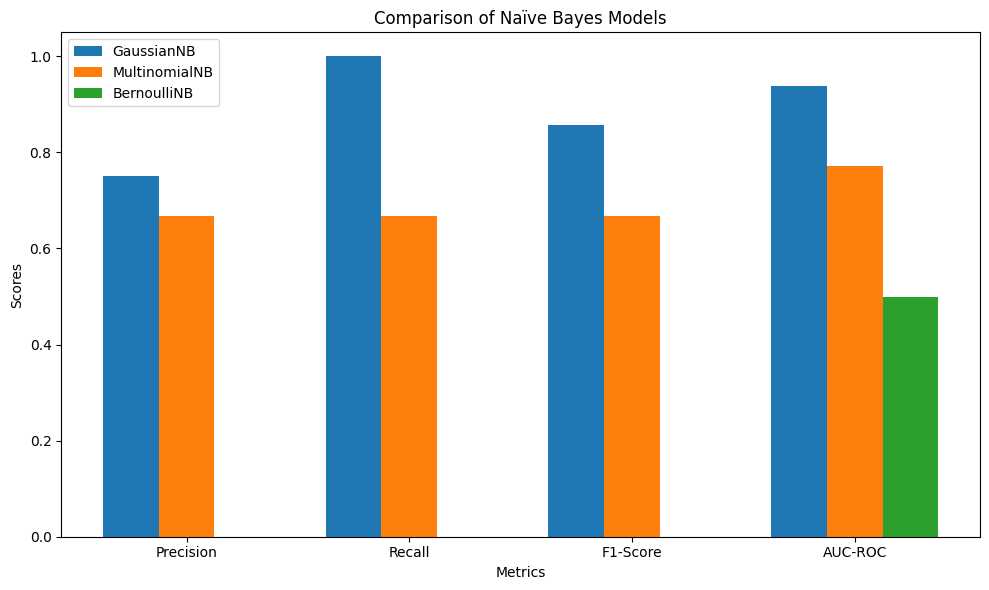

In [68]:
metrics = ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
gnb_values = [gnb_metrics['Precision'], gnb_metrics['Recall'], gnb_metrics['F1 Score'], gnb_metrics['AUC-ROC']]
mnb_values = [mnb_metrics['Precision'], mnb_metrics['Recall'], mnb_metrics['F1 Score'], mnb_metrics['AUC-ROC']]
bnb_values = [bnb_metrics['Precision'], bnb_metrics['Recall'], bnb_metrics['F1 Score'], bnb_metrics['AUC-ROC']]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))
width = 0.25

ax.bar(x - width, gnb_values, width, label='GaussianNB')
ax.bar(x, mnb_values, width, label='MultinomialNB')
ax.bar(x + width, bnb_values, width, label='BernoulliNB')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Naïve Bayes Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

1. Gaussian Naïve Bayes (GaussianNB)
    - Assumptions:
        - Feature Distribution: Assumes that the features are continuous and follow a Gaussian (normal) distribution. Each feature is assumed to have a bell-shaped distribution within each class.
        - Independence: Assumes conditional independence of features given the target class.
    - Results:
        - Precision: 0.75
        - Recall: 1.0
        - F1-Score: 0.86
        - AUC-ROC: 0.94

2. Multinomial Naïve Bayes (MultinomialNB)
    - Assumptions:
        - Feature Distribution: Assumes that features are discrete and follow a multinomial distribution (i.e., counts or frequencies).
        - Independence: Similar to Gaussian Naïve Bayes, MultinomialNB assumes conditional independence of features given the target class.
    -Results:
        - Precision: 0.67
        - Recall: 0.67
        - F1-Score: 0.67
        - AUC-ROC: 0.77

3. Bernoulli Naïve Bayes (BernoulliNB)
    - Assumptions:
        - Feature Distribution: Assumes that the features are binary (0 or 1). It is suited for situations where features are binary indicators of the presence or absence of something.
        - Independence: Like other Naïve Bayes models, BernoulliNB assumes conditional independence of features given the target class.
    - Results:
        - Precision: 0.0
        - Recall: 0.0
        - F1-Score: 0.0
        - AUC-ROC: 0.5
<br>
<b>Conclusion:</b>
Gaussian Naïve Bayes (GaussianNB) is the best model for this dataset based on its high recall, precision, F1 score, and AUC-ROC. The other models do not perform as well due to mismatched assumptions about the nature of the data.